<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06. 사이킷런으로 수행하는 타이타닉 생존자 예측**

#### **(1) 라이브러리 및 데이터**

##### a. 라이브러리 임포트 및 데이터 로딩

In [41]:
# 라이브러리 임포트 및 데이터 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 그래프 출력 결과를 노트북에서 볼 수 있도록 설정

titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### b. 사용된 변수 설명

1.   `PassengerId` : 탑승자 데이터 일련번호
2.   `Survived` : 생존 여부 (사망 = 0, 생존 =1)
3.   `Pclass` : 티켓의 선실 등급 (일등석 = 1, 이등석 = 2, 삼등석 = 3)
4.   `Sex` : 탑승자 성별
5.   `Name` : 탑승자 이름
6.   `Age` : 탑승자 나이
7.   `SibSp` : 같이 탑승한 형제자매 또는 배우자 인원 수
8.   `Parch` : 같이 탑승한 부모님 또는 어린이 인원 수
9.   `Ticket` : 티켓 번호
10.  `Cabin` : 선실 번호
11.  `Embarked` : 중간 정착 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)



##### c. 데이터 프레임의 칼럼 타입 확인

In [42]:
# 로딩된 데이터 칼럼 타입 확인
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


---

#### **(2) 데이터 전처리**

##### a. Null 값 처리


In [43]:
# 사이킷런 머신러닝은 Null 값을 허용하지 않으므로, Null 값을 채워야 함
# Age, Cabin, Embarked 칼럼에서 Null 값이 발견되므로, 이들의 Null 값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)              # Age 칼럼의 경우, Age 칼럼의 평균값으로 대체
titanic_df['Cabin'].fillna('N', inplace=True)                                 # Cabin 칼럼의 경우, 'N'으로 대체
titanic_df['Embarked'].fillna('N', inplace=True)                              # Embarked 칼럼의 경우, 'N'으로 대체
print('데이터 세트 Null 값 개수:', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수: 0


##### b. 문자열 피처 처리

In [44]:
# object : Name, Sex, Ticket, Cabin, Embarked
# Name과 Ticket은 탑승객을 식별하는 피처이므로, 값의 분포가 유의하지 않음
# Sex, Cabin, Embarked 피처에 대한 값 분류 확인
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())             # N : Null
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())       # N : Null

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [45]:
# Cabin(선실 번호)에서 중요한 것은 선실 등급을 나타내는 첫 번째 알파벳
# 따라서, Cabin의 첫 번째 글자만 추출해 선실 등급을 표시
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


---

#### **(3) 데이터 탐색 (EDA)**
  - 어떤 유형의 승객이 생존확률이 높았는가?

##### a. `성별`에 따른 생존 확률

In [46]:
titanic_df.groupby(['Sex', 'Survived']).count()
# 여성 사망자 수 = 81, 여성 생존자 수 = 233
# 남성 사망자 수 = 468, 남성 생존자 수 = 109

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

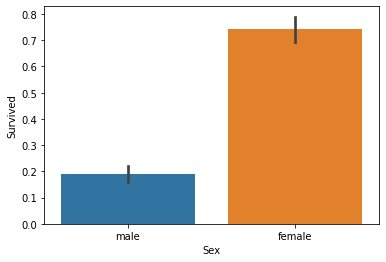

In [47]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)       # 여성 생존율이 남성 생존율이 약 4배 정도로 현저히 높음

##### b. `객실 등급`에 따른 생존 확률

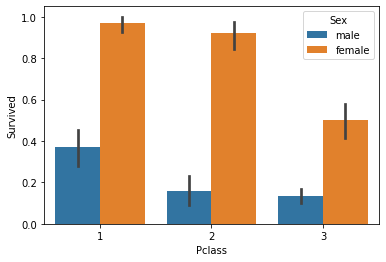

In [48]:
# 객실 등급과 성별을 함께 고려해 분석하는 것이 더욱 효율적
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
# 여성의 경우, 3등실에서 생존 확률이 현저히 감소
# 남성의 경우, 1등실의 생존 확률이 2,3등실에 비해 현저히 높음

##### c. `나이`에 따른 생존 확률

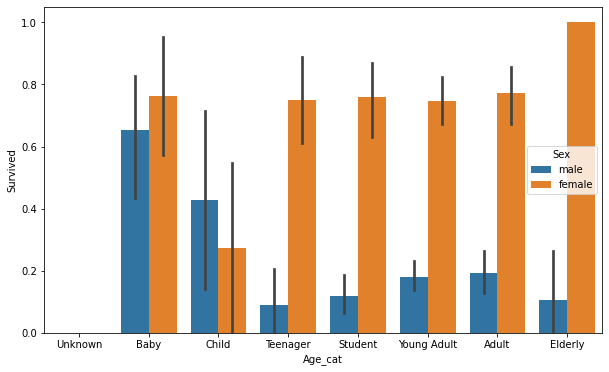

In [49]:
# 나이의 경우 값의 종류가 많으므로, 범주화하여 카테고리 변수로 할당
# 입력 age에 따라 구분 값을 반환하는 함수 설정, DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1 : cat = 'Unknown'
  elif age <= 5 : cat = 'Baby'          # Baby : 0~5세
  elif age <= 12 : cat = 'Child'
  elif age <= 18 : cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'

  return cat

# 막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

# 데이터 시각화
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

  - 이러한 분석을 통해 Sex, Age, Pclass 등이 생존을 좌우하는 중요한 피처임을 확인할 수 있다.

---

#### **(4) 데이터 가공**
  - 문자열 인코딩
  - 데이터 전처리를 한 번에 처리하는 함수 생성
  - 학습 데이터 / 테스트 데이터 분리

##### a. `문자열 카테고리 피처`를 숫자형 카테고리 피처로 변환 (`레이블 인코딩`)
  - 문자열 : `Sex`, `Cabin`, `Embarked`

In [50]:
# LabelEncoder 클래스를 이용해 레이블 인코딩 적용
# LabelEncoder 객체는 (0 ~ 카테고리 유형 수 -1)까지의 숫자값으로 변환
from sklearn import preprocessing

def encode_features(dataDF):                          # 레이블 인코딩을 수행하는 함수
  features = ['Sex', 'Cabin', 'Embarked']             # 숫자형으로 변환하고자 하는 피처 리스트
  for feature in features:
    le = preprocessing.LabelEncoder()                 # LabelEncoder() 객체 지정
    le = le.fit(dataDF[feature])                      # LabelEncoder.fit()
    dataDF[feature] = le.transform(dataDF[feature])   # LabelEncoder.transform()

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


##### b. 지금까지 `피처를 가공한 내역`을 정리하고, 이를 `함수로 설정`

In [51]:
# 1. Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)                                 
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 2. 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 3. 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder
def format_features(df):
  df['Cabin'] = df['Cabin'].str[0]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 4. 앞에서 설정한 데이터 전처리 함수 호출
# transform_features() : 데이터 전처리를 전체적으로 호출하는 함수
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

##### c. `transform_features( )` 함수를 이용해 `원본 데이터 가공`
  - **Label** : `Survived`
    - Survived 속성만 별도로 분리, 결정값 데이터 세트로 지정
  - **Features** : Survived를 제외한 `나머지 칼럼`
    - Survived 속성을 drop하여 피처 데이터 세트 지정
  - Feature 데이터 세트에 `transform_features()`를 적용해 데이터 가공

In [52]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

##### d. `학습 데이터`와 `테스트 데이터` 분리

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)

---

#### **(5) 타이타닉 생존자 수 예측**
  - `결정 트리`, `랜덤 포레스트`, `로지스틱 회귀` 이용
  - 학습 데이터로 머신러닝 모델을 학습, 테스트 데이터로 머신러닝 모델을 예측
  - 예측 `성능 평가`는 정확도로 측정 : `accuracy_score()`

##### a. `교차 검증을 사용하지 않은` 모델 학습/예측/평가

In [54]:
from sklearn.tree import DecisionTreeClassifier         # 결정 트리 객체
from sklearn.ensemble import RandomForestClassifier     # 랜덤 포레스트 객체
from sklearn.linear_model import LogisticRegression     # 로지스틱 회귀 객체
from sklearn.metrics import accuracy_score              # 모형 성능 평가 : 정확도 측정

# 1. 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성 (객체 지정)
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# 2. DecisionTreeClassifier로 학습/예측/평가
dt_clf.fit(X_train, y_train)            # 모델 학습 : fit(train data)
dt_pred = dt_clf.predict(X_test)        # 모델 예측 : predict(test data)
print('결정 트리의 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 3. RandomForestClassifier로 학습/예측/평가
rf_clf.fit(X_train, y_train)            # 모델 학습 : fit(train data)
rf_pred = rf_clf.predict(X_test)        # 모델 예측 : predict(test data)
print('랜덤 포레스트의 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 4. LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)            # 모델 학습 : fit(train data)
lr_pred = lr_clf.predict(X_test)        # 모델 예측 : predict(test data)
print('로지스틱 회귀의 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정 트리의 정확도 : 0.7877
랜덤 포레스트의 정확도 : 0.8547
로지스틱 회귀의 정확도 : 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##### b. `교차 검증`을 사용한 모델 학습/예측/평가
  - `KFold`를 이용한 교차 검증
  - `cross_val_score()`를 이용한 교차 검증
  - `GridSearchCV`를 이용해 `최적 하이퍼 파라미터`를 찾고, 예측 성능 측정

In [55]:
# 1. KFold를 이용한 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트가 5개인 KFold 객체 생성, 폴드 수만큼 예측결과를 저장하기 위한 리스트 객체 설정
  kfold = KFold(n_splits=5)       # KFold 객체 생성
  scores = []                     # 정확도 결과를 저장할 리스트

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습/예측/평가(정확도 계산)
    clf.fit(X_train, y_train)           # 모델 학습 : train data
    predictions = clf.predict(X_test)   # 모델 예측 : test data
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도 : {0:.4f}'.format(mean_score))

# exec_kfold 호출
# 결정 트리를 객체로 한 교차 검증 정확도
exec_kfold(dt_clf, folds=5)       # 결정 트리 : 약 78.23%

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [56]:
# 2. cross_val_score()를 이용한 교차 검증
# cross_val_score(estimator, X, y, scoring, cv)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))       
# Classification일 경우, cross_val_score()가 StratifiedKFold로 분할하여 위의 경우와 약간의 오차가 발생

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879


In [57]:
# 3. GridSearchCV를 이용해 최적 하이퍼 파라미터를 찾고, 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)     # 객체 설정
grid_dclf.fit(X_train, y_train)           # 모델 학습 : train data

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 :', np.round(grid_dclf.best_score_, 4))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier의 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier의 정확도 : 0.8715


  - 최적의 파라미터로 튜닝하기 전보다 정확도가 약 8% 증가